# DM2022-Lab2-Homework Part1
- Name: 陳奕君
- Student ID: 111062610

For the text answer, please see **My Answer** part for each exercise.

In [60]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import itertools
import warnings
import gensim
import tensorflow
import keras
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger

from gensim.models import KeyedVectors

warnings.filterwarnings('ignore')

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.2.0
tensorflow: 2.10.0
keras: 2.10.0


In [2]:
### training data
anger_train = pd.read_csv("data/anger-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/fear-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/joy-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/sadness-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [6]:
### testing data
anger_test = pd.read_csv("data/anger-ratings-0to1.dev.target.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/sadness-ratings-0to1.dev.target.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/fear-ratings-0to1.dev.target.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/joy-ratings-0to1.dev.target.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [7]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


## Exercise 1 
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

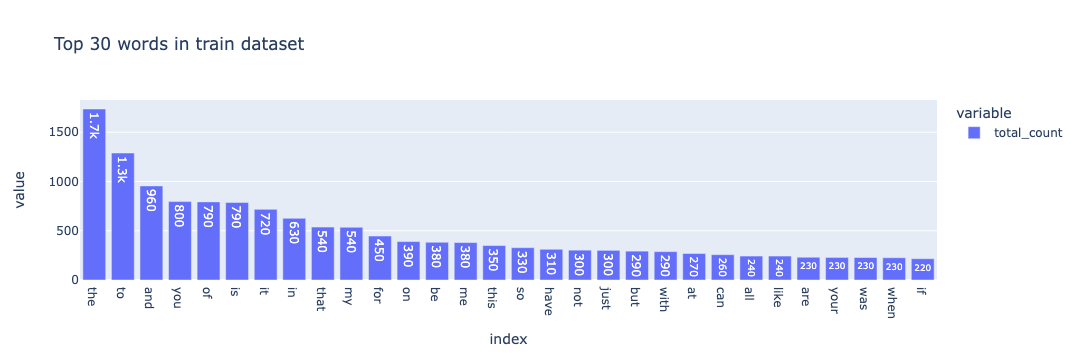

In [23]:
# Answer here
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train_df.text)

freq_df = pd.DataFrame(X_counts.toarray())
freq_df.columns = count_vect.get_feature_names_out()
plot_df = freq_df.T                                              # So each column is one document, and each row is a word
plot_df['total_count'] = plot_df.sum(axis=1)
plot_df = plot_df.sort_values(by='total_count', ascending=False) # Here we get the sorted total_count
plot_sr = plot_df['total_count']                                 # Extract the total_count to plot

# Then we plot the top 30 frequent terms in bar plot
fig = px.bar(plot_sr[:30], text_auto='.2s', title='Top 30 words in train dataset')
fig.show()

In [20]:
test_df.shape

(347, 4)

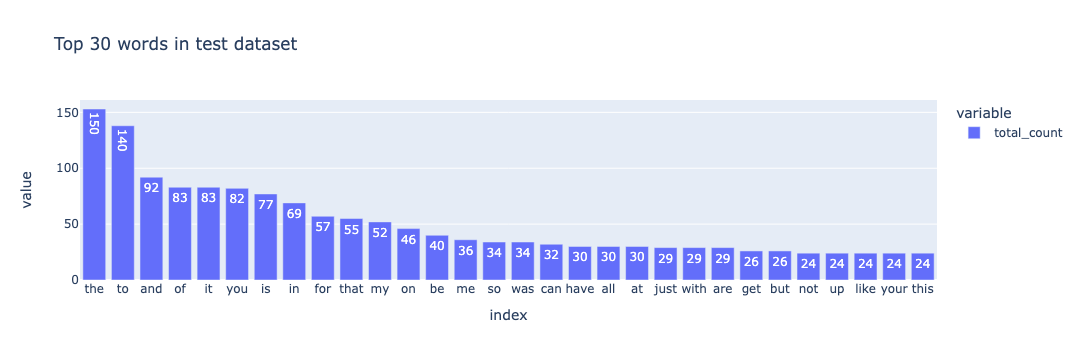

In [25]:
X_counts = count_vect.fit_transform(test_df.text)

freq_df = pd.DataFrame(X_counts.toarray())
freq_df.columns = count_vect.get_feature_names_out()
plot_df = freq_df.T                                              # So each column is one document, and each row is a word
plot_df['total_count'] = plot_df.sum(axis=1)
plot_df = plot_df.sort_values(by='total_count', ascending=False) # Here we get the sorted total_count
plot_sr = plot_df['total_count']                                 # Extract the total_count to plot

fig = px.bar(plot_sr[:30], text_auto='.2s', title='Top 30 words in test dataset')
fig.show()

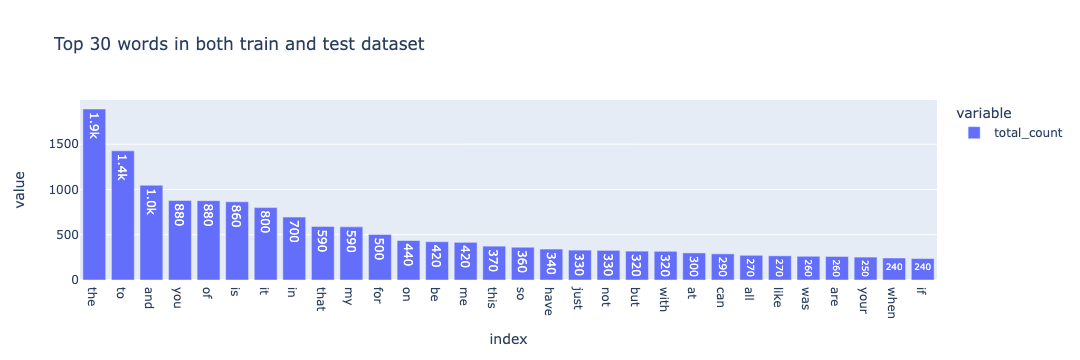

In [26]:
both_df = pd.concat([train_df, test_df])
X_counts = count_vect.fit_transform(both_df.text)

freq_df = pd.DataFrame(X_counts.toarray())
freq_df.columns = count_vect.get_feature_names_out()
plot_df = freq_df.T                                              # So each column is one document, and each row is a word
plot_df['total_count'] = plot_df.sum(axis=1)
plot_df = plot_df.sort_values(by='total_count', ascending=False) # Here we get the sorted total_count
plot_sr = plot_df['total_count']                                 # Extract the total_count to plot

fig = px.bar(plot_sr[:30], text_auto='.2s', title='Top 30 words in both train and test dataset')
fig.show()

## Exercise 2
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [30]:
tfidf = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) # 1000 features
data_tfidf = tfidf.fit_transform(train_df.text)

feature_names_1000 = tfidf.get_feature_names_out()
print(feature_names_1000[100:110])

['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


## Exercise 3
Can you interpret the results above? What do they mean?

In [39]:
### First I repeat the step in DM2022-Lab2-Master.ipynb, then give the answer ###


# for a classificaiton problem, you need to provide both training & testing data
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## result evaluation
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
training accuracy: 0.99
testing accuracy: 0.68


In [43]:
print(classification_report(y_true=y_test, y_pred=y_test_pred), end="\n\n")
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347


[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [44]:
# Funciton for visualizing confusion_matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

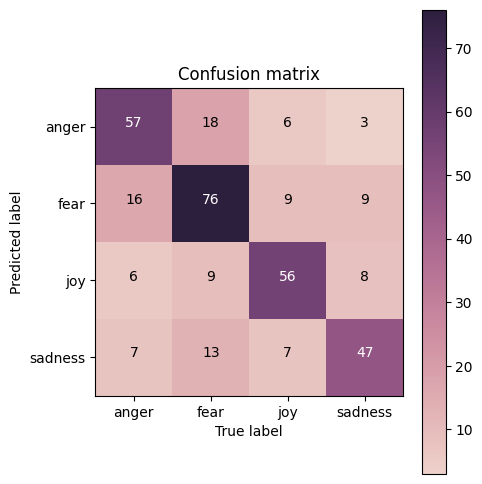

In [45]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

**My Answer**

The x-axis means the true label provided by data, the y-axis means the label predicted by our DecisionTree model. When the true label equals predicted label, it means that our model classified correctly, otherwise it did wrongly. For example, the value of (true label = `anger`, predicted label = `sadness`) is 7, it means model had classified 7 `anger` data to label `sadness`.

The darker the color, the more the value. We can see that the diagnoal of same labels is very apparent, so we can say that our model classified roughly correctly.

1. It has the most accuracy on classifying `fear` label, we can see that it has 76 correct cases, much higher than other labels.
2. We can also notice that the color of upper left corner is darker, it means that our model are most confused about anger and fear than other lables.

---
## Exercise 4
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

train score: 0.7918627179629117
test score: 0.6974063400576369
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



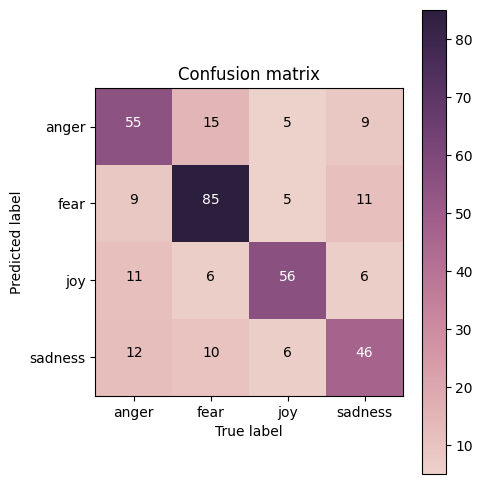

In [47]:
# Answer here
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

print("train score:", mnb.score(X_train, y_train))
print("test score:", mnb.score(X_test, y_test))

y_train_pred = mnb.predict(X_train)
y_test_pred = mnb.predict(X_test)
 
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# my_tags = ['anger', 'fear', 'joy', 'sadness']
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

**My Answer**

1. It has the best result on fear label, others' performance is similar to decision tree. I guess it's because text with fear emotion has more unique key words than other emotion, such as afraid, fear, terrified.
2. It has the less precision and recall on anger and sadness, same as decision tree.

---
## Exercise 5
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**My Answer**
- Decision Tree is a tree-based algorithm that at every node, it would create the path that can decrease the most randomness.
- Naive Bayes consider every feature as a independent possibility distribution.


Comparing to the precision, recall and f1-score of two method, we can see that the result of decision tree is more unified than naive bayes. That is, the difference between each emotion score in decision tree is smaller than naive bayes (precision: 0.06 vs 0.15, recall: 0.07 vs 0.15, f1-score: 0.04 vs 0.12).

It is due to the fact that decision tree aims to decrease randomness while naive bayes calculates each feature possibility distribution independently. I guess that the reason fo `fear` label can work well in naive bayes is that there is more unique key words in fear emotion, so every time naive bayes see those words, it would have higher probability to classify to `fear`.

---
## Exercise 6
Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [50]:
### First I repeast the steps in DM2022-Lab2-Master.ipynb, then give the answer ###

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## deal with label (string -> one-hot)


label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
input_shape:  500
output_shape:  4


In [51]:
# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2022-11-25 15:08:33.565123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [54]:
csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 0s 3ms/step - loss: 0.9978 - accuracy: 0.6443 - val_loss: 0.9306 - val_accuracy: 0.6657
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7927 - val_loss: 0.7404 - val_accuracy: 0.7176
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8450 - val_loss: 0.7395 - val_accuracy: 0.7176
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3417 - accuracy: 0.8730 - val_loss: 0.7552 - val_accuracy: 0.7233
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.9009 - val_loss: 0.8458 - val_accuracy: 0.6801
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9206 - val_loss: 0.8523 - val_accuracy: 0.7061
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9388 - val_loss: 0.9175 - val_accuracy: 0.6974
Epoch 

In [55]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

3/3 [==============================] - 0s 2ms/step
testing accuracy: 0.68


In [56]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.644340,0.997826,0.665706,0.930596
1,1,0.792693,0.591888,0.717579,0.740390
2,2,0.845004,0.423206,0.717579,0.739540
3,3,0.872959,0.341663,0.723343,0.755190
4,4,0.900913,0.275799,0.680115,0.845839
5,5,0.920565,0.230372,0.706052,0.852344
6,6,0.938832,0.193006,0.697406,0.917497
7,7,0.945198,0.170671,0.706052,0.945438
8,8,0.961528,0.141157,0.691643,1.026313
9,9,0.962912,0.126771,0.703170,1.061175


**My Answer**

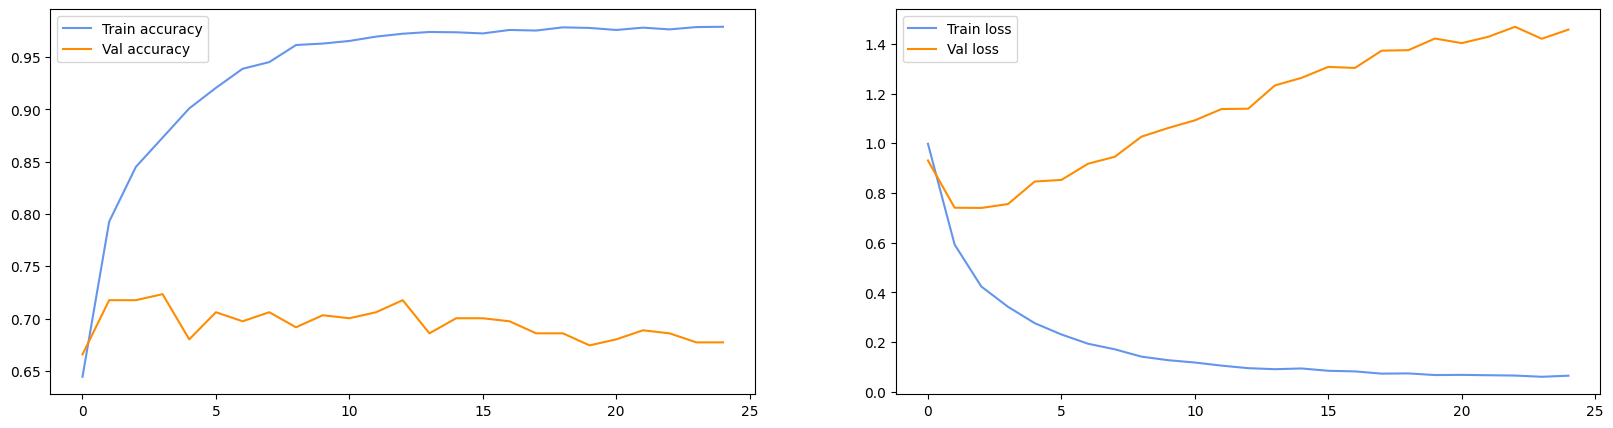

In [57]:
# Answer here
epoch = training_log.epoch.to_numpy()
train_acc = training_log.accuracy.to_numpy()
val_acc = training_log.val_accuracy.to_numpy()
loss = training_log.loss.to_numpy()
val_loss = training_log.val_loss.to_numpy()

figure, axis = plt.subplots(1, 2, figsize=(20, 5))

axis[0].plot(epoch, train_acc, color='cornflowerblue', label='Train accuracy')
axis[0].plot(epoch, val_acc, color='darkorange', label='Val accuracy')
axis[0].legend()

axis[1].plot(epoch, loss, color='cornflowerblue', label='Train loss')
axis[1].plot(epoch, val_loss, color='darkorange', label='Val loss')
axis[1].legend()

plt.show()

## Exercise 7
Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

**My Answer**

1. First, we need to tokenize our sentences into words. 
2. Then every words we have a corresponding number vector for it, so we can represent a sentence into a big number matrix.
3. Now we have the input matrix, we can feed it into our network, do the calculation through neural networks and get the final result.

---
## Exercise 8
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [61]:
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [62]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

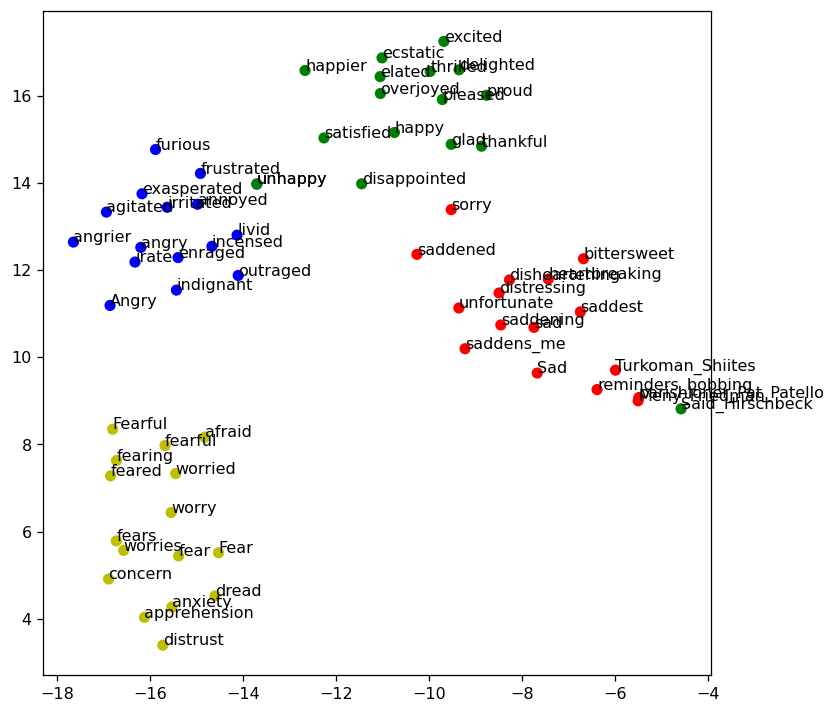

In [63]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()